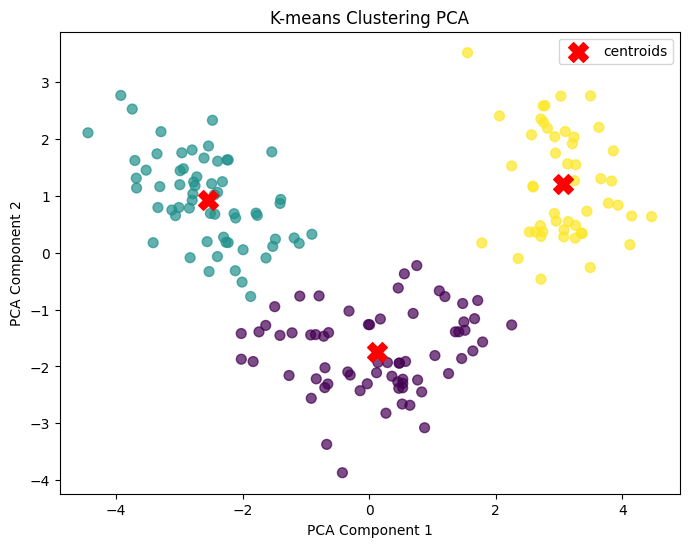

Cluster Centers (original scale):
[[1.22644776e+01 1.91223881e+00 2.22432836e+00 1.99537313e+01
  9.26567164e+01 2.23507463e+00 2.02850746e+00 3.61343284e-01
  1.59731343e+00 3.02089552e+00 1.05605970e+00 2.77507463e+00
  5.07208955e+02 2.00000000e+00]
 [1.36767742e+01 1.99790323e+00 2.46629032e+00 1.74629032e+01
  1.07967742e+02 2.84758065e+00 3.00322581e+00 2.92096774e-01
  1.92209677e+00 5.45354839e+00 1.06548387e+00 3.16338710e+00
  1.10022581e+03 1.04838710e+00]
 [1.31516327e+01 3.34448980e+00 2.43469388e+00 2.14387755e+01
  9.90204082e+01 1.67816327e+00 7.97959184e-01 4.50816327e-01
  1.16306122e+00 7.34326529e+00 6.85918367e-01 1.69020408e+00
  6.27551020e+02 2.97959184e+00]]


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

class KMeansFromScratch:
    def __init__(self, n_clusters, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.centroids = None

    def initialize_centroids(self, data):
        np.random.seed(42) 
        random_indices = np.random.choice(data.shape[0], self.n_clusters, replace=False)
        return data[random_indices]

    def compute_distances(self, data, centroids):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2) #broadcasting (n_samples, n_clusters, n_features)
        return distances

    def assign_clusters(self, distances):
        return np.argmin(distances, axis=1) #returns index of minimum value along specified axis

    def update_centroids(self, data, labels):
        return np.array([data[labels == k].mean(axis=0) for k in range(self.n_clusters)])

    def fit(self, data):
        self.centroids = self.initialize_centroids(data)
        for _ in range(self.max_iters):
            distances = self.compute_distances(data, self.centroids)
            labels = self.assign_clusters(distances)
            self.centroids = self.update_centroids(data, labels)
        self.labels = labels
        return self

    def predict(self, data):
        distances = self.compute_distances(data, self.centroids)
        return self.assign_clusters(distances)

data_df = pd.read_csv("Clustering_Data.csv")

data = data_df.select_dtypes(include=[np.number]).dropna().to_numpy()  # Select numeric columns and drop NaN
data_mean=data.mean(axis=0)
data_std=data.std(axis=0)
data_scaled = (data - data.mean(axis=0)) / data.std(axis=0) 

kmeans = KMeansFromScratch(n_clusters=3, max_iters=100)
kmeans.fit(data_scaled)

#PCA
pca=PCA(n_components=2) 
pca_data=pca.fit_transform(data_scaled)
pca_centroids=pca.transform(kmeans.centroids)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0],pca_data[:,1],c=kmeans.labels,cmap='viridis',s=50,alpha=0.7)
plt.scatter(pca_centroids[:,0],pca_centroids[:,1],c='red',s=200,marker='X',label='centroids')
plt.title('K-means Clustering PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

original_centroids = kmeans.centroids * data_std + data_mean
print("Cluster Centers (original scale):")
print(original_centroids)
